# Exploring the India taxcalc package
## August 20, 2019

This notebook repeats the steps we took to delve into the `taxcalc` packaged developed by the TPRU.


### We begin by importing `taxcalc`

Before we can do this, we need to build the `taxcalc` package.  We build this package with the following steps:
1) Making sure were were in a python environment with all necessary packages (e.g., the `ogindia-dev` environment)
2) Navigating to `/taxcalc/` and executing the command `pip install -e .` (or `python setup.py develop`) in the command line.


In [1]:
# import all modules and classes from taxcalc
from taxcalc import *

## 1. Create an instance of the records class

Note that by passing no arguments to `Records()`, the class will look for a file called `pit.csv` in the `/taxcalc/taxcalc` directory.

In [2]:
recs = Records()

In [3]:
# We can peer into the Records class object with dir():
dir(recs)

['AGEGRP',
 'AYEAR',
 'Aggregate_Income',
 'BFL_SET_OFF_BALANCE',
 'BF_Losses',
 'CALCULATED_VARS',
 'CHANGING_CALCULATED_VARS',
 'CUR_PATH',
 'CYL_SET_OFF',
 'CY_Losses',
 'FILING_SEQ_NO',
 'GTI',
 'IGNORED_VARS',
 'INCOME_HP',
 'INTEGER_READ_VARS',
 'INTEGER_VARS',
 'Income_BP',
 'Income_Rate_Purpose',
 'Income_Salary',
 'LT_CG_AMT_1',
 'LT_CG_AMT_2',
 'MUST_READ_VARS',
 'NET_AGRC_INCOME',
 'PITCSV_YEAR',
 'PIT_DATA_FILENAME',
 'PIT_WEIGHTS_FILENAME',
 'PRFT_GAIN_BP_INC_115BBF',
 'PRFT_GAIN_BP_OTHR_SPECLTV_BUS',
 'PRFT_GAIN_BP_SPCFD_BUS',
 'PRFT_GAIN_BP_SPECLTV_BUS',
 'SALARIES',
 'ST_CG_AMT_1',
 'ST_CG_AMT_2',
 'ST_CG_AMT_APPRATE',
 'TI_special_rates',
 'TOTAL_DEDUC_10AA',
 'TOTAL_DEDUC_VIA',
 'TOTAL_INCOME_OS',
 'TTI',
 'Tax_LT_CG_RATE1',
 'Tax_LT_CG_RATE2',
 'Tax_ST_CG_APPRATE',
 'Tax_ST_CG_RATE1',
 'Tax_ST_CG_RATE2',
 'Total_Tax_Cap_Gains',
 'Total_Tax_LTCG',
 'Total_Tax_STCG',
 'USABLE_READ_VARS',
 'VAR_INFO_FILENAME',
 'WT',
 '_Records__current_year',
 '_Records__data_year',
 '

What we get from `dir(recs)` is a list of all the attributes (contant values) and methods (functions) that the `Records` class contains.

Note that `rec` will contain (among these attributes and methods) the tax data in the `pit.csv` file.

## 2. Create instances of the `GSTRecords()` and `CorpRecords()` classes

In [4]:
grecs = GSTRecords()
crecs = CorpRecords()

## 3. Specify a set of policy parameters

We do this by creating an instance of the `Policy` class.  If we pass no arguments to `Policy`, as we do below, we are implicitly saying to load the *baseline* policy (e.g., the model may have a current law baseline).  

If we wanted to deviate from the baseline policy, we would enter a dictionary of parameter changes (that would need to be consistent with the syntax used by `taxcalc`

In [5]:
pol = Policy()

## 4. Create a `taxcalc` instance

Now that we have specified tax data and tax policy, we can put them together in a calculator class.  Loading and instance of the class will allow us to do some calculations on the tax data using the tax parameters specified in `pol`.

In [6]:
calc1 = Calculator(policy=pol, records=recs,
                   gstrecords=grecs, corprecords=crecs,
                   verbose=False)

Note that executing the cell above returns nothing.  It simply creates the class. Now you need to give more instruction to run some calculations.

To do this, first we'll give the calculator a year for which we want to do calculations:

In [7]:
calc1.advance_to_year(2020)

Next, we'll tell it do some (actually all) calculations:

In [8]:
calc1.calc_all()

Again - nothing is returned!  Calculations were done (you might have noticed it took a few seconds to execute the cell above), but all the results are simply stored somewhere in the `calc1` class object.

To see what is in this object, we can again, use `dir()`:

In [9]:
dir(calc1)

['MTR_VALID_VARIABLES',
 'REQUIRED_ASSUMP_KEYS',
 'REQUIRED_REFORM_KEYS',
 '_Calculator__corprecords',
 '_Calculator__gstrecords',
 '_Calculator__policy',
 '_Calculator__records',
 '_Calculator__stored_records',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_convert_parameter_dict',
 '_read_json_econ_assump_text',
 '_read_json_policy_reform_text',
 'advance_to_year',
 'array',
 'array_len',
 'calc_all',
 'carray',
 'current_year',
 'data_year',
 'dataframe',
 'diagnostic_table',
 'difference_table',
 'distribution_table_dataframe',
 'distribution_tables',
 'garray',
 'incarray',
 'increment_year',
 'mtr',
 'n65',
 'policy_current_year',
 'policy_param',
 'read_json_

I see an attribute called `dataframe`.  This looks interesting.  Maybe we can get this back and look at the data - including any calculations of tax liability.

I try:

In [10]:
calc1.dataframe()

TypeError: dataframe() missing 1 required positional argument: 'variable_list'

I do not get a dataframe back.  I then look at the source code for the `Calculator` class in `/taxcalc/taxcalc/calculator.py`, [here](https://github.com/TPRU-India/taxcalc/blob/311dd238c4d8be590b513b653227a401ac86c7e9/taxcalc/calculator.py#L238).  I see that I need to pass the function a list of variable names.

I'm not sure of what the variable names are in these data.  So I look in the `taxcalc/taxcalc/records_variables.json`, [here](https://github.com/TPRU-India/taxcalc/blob/master/taxcalc/records_variables.json).  I pick a couple I'm interested in:

In [11]:
df = calc1.dataframe(['pitax', 'GTI'])

In [12]:
# look at the first 5 observations:
df.head(n=5)

,pitax,GTI
0,454779.734425,2.233925e+06
1,0.000000,2.261620e+05
2,54627.426428,8.501319e+05
3,9250.767421,5.883654e+05
4,7225.503704,4.329820e+05


Excellent!  We were able to use `taxcalc` to compute PIT liability for all filers in our data in 2020 and return the results to a dataframe.

Let's look at effective tax rates (ETRs) in these data:

In [13]:
# create ETR variable
df['ETR'] = df['pitax']/df['GTI']
# summarize the data
df.describe()

,pitax,GTI,ETR
count,200.000000,2.000000e+02,200.000000
mean,74341.502367,7.708530e+05,0.054734
std,133600.062019,5.632945e+05,0.059807
min,0.000000,3.920387e+04,0.000000
25%,7146.137710,3.994817e+05,0.015765
50%,12269.856030,5.688373e+05,0.022034
75%,72240.893908,9.241813e+05,0.079225
max,798285.212653,3.333606e+06,0.239466


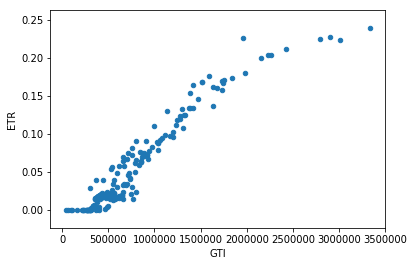

In [14]:
# plot relation between ETR and GTI
import matplotlib.pyplot as plt
%matplotlib inline
df.plot.scatter(x='GTI', y='ETR')